<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [41]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [42]:
def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''    

    # grayscale the input
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define the parameters
    k = 0.06 # Sensitivity parameter
    window_size = 3 # Window size for applying kernel on pixel and its neighbors
    threshold = 0.01 # Threshold for corner response

    # Compute the derivatives
    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1)

    # Compute the products of the derivatives
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    # Define a rectangle kernel
    kernel = np.ones((window_size, window_size), dtype=np.float64) / (window_size ** 2)

    # Apply kernel
    Mxx = cv2.filter2D(Ixx, -1, kernel)
    Myy = cv2.filter2D(Iyy, -1, kernel)
    Mxy = cv2.filter2D(Ixy, -1, kernel)

    # Compute the Harris response for each pixel
    R = (Mxx * Myy - Mxy * Mxy) - k * (Mxx + Myy) ** 2

    # Apply non-maximum suppression to find the local maximum of R
    result = np.zeros(image.shape)
    max_R = np.max(R)
    # Create a mask of pixels that are greater than threshold and their 8 neighbors
    mask = (R > threshold * max_R) & \
        (R > np.roll(R, -1, axis=0)) & (R > np.roll(R, 1, axis=0)) & \
        (R > np.roll(R, -1, axis=1)) & (R > np.roll(R, 1, axis=1)) & \
        (R > np.roll(np.roll(R, -1, axis=0), -1, axis=1)) & \
        (R > np.roll(np.roll(R, -1, axis=0), 1, axis=1)) & \
        (R > np.roll(np.roll(R, 1, axis=0), -1, axis=1)) & \
        (R > np.roll(np.roll(R, 1, axis=0), 1, axis=1))
    # Mark the corners with 1
    result[mask] = 1

    
    return R, result

<h3><font color = "#079e05"> Show the result </font></h3>

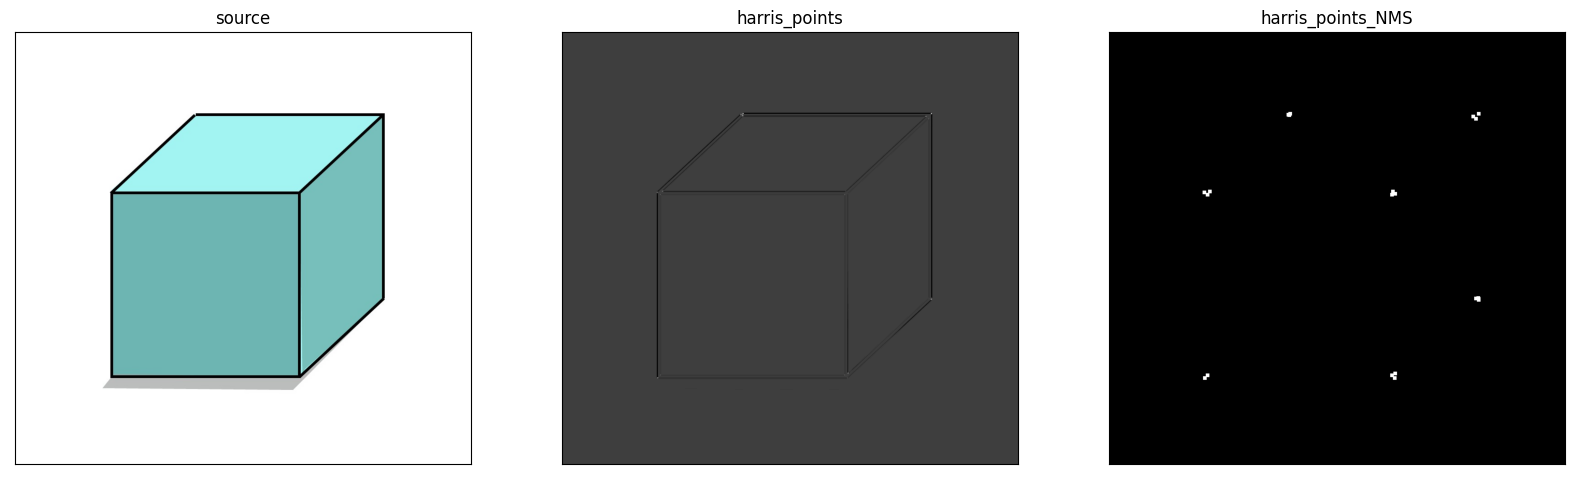

In [43]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
before_NMS, after_NMS = harris_points(image)
after_NMS = cv2.dilate(after_NMS,np.ones((8,8)))
image_list.append([before_NMS, 'harris_points', 'img'])
image_list.append([after_NMS, 'harris_points_NMS', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '5_1')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [44]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
    
    # grayscale input
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define the parameters
    k = 0.06 # Sensitivity parameter
    window_size = 3 # Window size for applying kernel on pixel and its neighbors
    sobel_size = 3 # size of sobel filter
    
    
    return cv2.cornerHarris(image,window_size,sobel_size,k)

<h3><font color = "#079e05"> Show the result </font></h3>

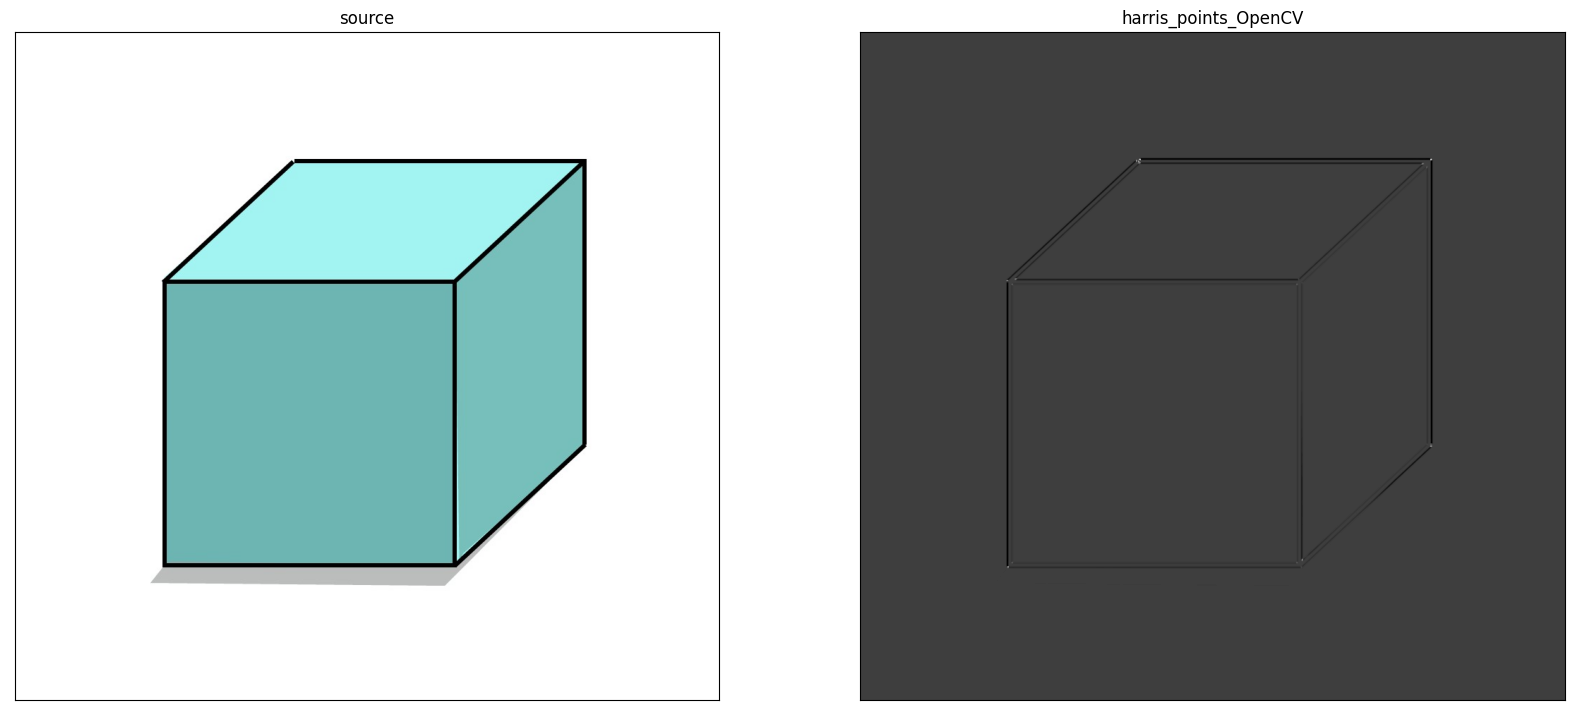

In [45]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(image), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '5_2')